# Основы глубинного обучения, майнор ИАД

## Домашнее задание 1. Введение в PyTorch. Полносвязные нейронные сети.

### Общая информация

Дата выдачи: 20.09.2022

Мягкий дедлайн: 23:59MSK 04.10.2022

Жесткий дедлайн: 23:59MSK 10.10.2022

### Оценивание и штрафы
Максимально допустимая оценка за работу — 10 баллов. За каждый день просрочки снимается 1 балл. Сдавать задание после жёсткого дедлайна сдачи нельзя.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов. Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.
Также оценка может быть снижена за плохо читаемый код и плохо оформленные графики. Все ответы должны сопровождаться кодом или комментариями о том, как они были получены.

### О задании

В этом задании вам предстоит предсказывать год выпуска песни (**задача регрессии**) по некоторым звуковым признакам: [данные](https://archive.ics.uci.edu/ml/datasets/yearpredictionmsd). В ячейках ниже находится код для загрузки данных. Обратите внимание, что обучающая и тестовая выборки располагаются в одном файле, поэтому НЕ меняйте ячейку, в которой производится деление данных.

In [140]:
import torch
from torch import nn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import tqdm
import torch.nn.functional as F
import itertools
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


In [2]:
# %conda install wget

In [3]:
!wget -O data.txt.zip https://archive.ics.uci.edu/ml/machine-learning-databases/00203/YearPredictionMSD.txt.zip

--2022-10-05 17:42:49--  https://archive.ics.uci.edu/ml/machine-learning-databases/00203/YearPredictionMSD.txt.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 211011981 (201M) [application/x-httpd-php]
Saving to: ‘data.txt.zip’

data.txt.zip        100%[===================>] 201.24M  85.7MB/s    in 2.3s    

2022-10-05 17:42:51 (85.7 MB/s) - ‘data.txt.zip’ saved [211011981/211011981]



In [141]:
df = pd.read_csv('/content/data.txt.zip', header=None)
df

,0,1,2,3,4,5,6,7,8,9,...,81,82,83,84,85,86,87,88,89,90
0,2001,49.94357,21.47114,73.07750,8.74861,-17.40628,-13.09905,-25.01202,-12.23257,7.83089,...,13.01620,-54.40548,58.99367,15.37344,1.11144,-23.08793,68.40795,-1.82223,-27.46348,2.26327
1,2001,48.73215,18.42930,70.32679,12.94636,-10.32437,-24.83777,8.76630,-0.92019,18.76548,...,5.66812,-19.68073,33.04964,42.87836,-9.90378,-32.22788,70.49388,12.04941,58.43453,26.92061
2,2001,50.95714,31.85602,55.81851,13.41693,-6.57898,-18.54940,-3.27872,-2.35035,16.07017,...,3.03800,26.05866,-50.92779,10.93792,-0.07568,43.20130,-115.00698,-0.05859,39.67068,-0.66345
3,2001,48.24750,-1.89837,36.29772,2.58776,0.97170,-26.21683,5.05097,-10.34124,3.55005,...,34.57337,-171.70734,-16.96705,-46.67617,-12.51516,82.58061,-72.08993,9.90558,199.62971,18.85382
4,2001,50.97020,42.20998,67.09964,8.46791,-15.85279,-16.81409,-12.48207,-9.37636,12.63699,...,9.92661,-55.95724,64.92712,-17.72522,-1.49237,-7.50035,51.76631,7.88713,55.66926,28.74903
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515340,2006,51.28467,45.88068,22.19582,-5.53319,-3.61835,-16.36914,2.12652,5.18160,-8.66890,...,4.81440,-3.75991,-30.92584,26.33968,-5.03390,21.86037,-142.29410,3.42901,-41.14721,-15.46052
515341,2006,49.87870,37.93125,18.65987,-3.63581,-27.75665,-18.52988,7.76108,3.56109,-2.50351,...,32.38589,-32.75535,-61.05473,56.65182,15.29965,95.88193,-10.63242,12.96552,92.11633,10.88815
515342,2006,45.12852,12.65758,-38.72018,8.80882,-29.29985,-2.28706,-18.40424,-22.28726,-4.52429,...,-18.73598,-71.15954,-123.98443,121.26989,10.89629,34.62409,-248.61020,-6.07171,53.96319,-8.09364
515343,2006,44.16614,32.38368,-3.34971,-2.49165,-19.59278,-18.67098,8.78428,4.02039,-12.01230,...,67.16763,282.77624,-4.63677,144.00125,21.62652,-29.72432,71.47198,20.32240,14.83107,39.74909


In [142]:
X = df.iloc[:, 1:].values
y = df.iloc[:, 0].values

train_size = 463715
X_train = X[:train_size, :]
y_train = y[:train_size]
X_test = X[train_size:, :]
y_test = y[train_size:]

## Задание 0. (0 баллов, но при невыполнении максимум за все задание &mdash; 0 баллов)

Мы будем использовать RMSE как метрику качества. Для самого первого бейзлайна обучите `Ridge` регрессию из `sklearn`. Кроме того, посчитайте качество при наилучшем константном прогнозе.

In [143]:
# YOUR CODE HERE (－.－)...zzzZZZzzzZZZ
import sklearn
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error 
alphas = [0.001, 0.01, 0.05, 0.1, 0.5, 0.75]

metrics = {}
for a in alphas:
    linear_model = Ridge(alpha=a)
    linear_model.fit(X_train, y_train)
    predictions = (linear_model.predict(X_test))
    metrics[f'alpha={a}'] = f'RMSE:{np.sqrt(mean_squared_error(y_test, predictions))}'

In [144]:
metrics

{'alpha=0.001': 'RMSE:9.510160707492506',
 'alpha=0.01': 'RMSE:9.510160707527469',
 'alpha=0.05': 'RMSE:9.510160707682859',
 'alpha=0.1': 'RMSE:9.510160707877098',
 'alpha=0.5': 'RMSE:9.510160709431005',
 'alpha=0.75': 'RMSE:9.510160710402198'}

## Задание 1. (максимум 10 баллов)

Реализуйте обучение и тестирование нейронной сети для предоставленного вам набора данных. Соотношение между полученным значением метрики на тестовой выборке и баллами за задание следующее:

- $\text{RMSE} \le 9.00 $ &mdash; 4 балла
- $\text{RMSE} \le 8.90 $ &mdash; 6 баллов
- $\text{RMSE} \le 8.80 $ &mdash; 8 баллов
- $\text{RMSE} \le 8.75 $ &mdash; 10 баллов

Есть несколько правил, которых вам нужно придерживаться:

- Весь пайплайн обучения должен быть написан на PyTorch. При этом вы можете пользоваться другими библиотеками (`numpy`, `sklearn` и пр.), но только для обработки данных. То есть как угодно трансформировать данные и считать метрики с помощью этих библиотек можно, а импортировать модели из `sklearn` и выбивать с их помощью требуемое качество &mdash; нельзя. Также нельзя пользоваться библиотеками, для которых сам PyTorch является зависимостью.

- Мы никак не ограничиваем ваш выбор архитектуры модели, но скорее всего вам будет достаточно полносвязной нейронной сети.

- Для обучения запрещается использовать какие-либо иные данные, кроме обучающей выборки.

- Ансамблирование моделей запрещено.

### Полезные советы:

- Очень вряд ли, что у вас с первого раза получится выбить качество на 10 баллов, поэтому пробуйте разные архитектуры, оптимизаторы и значения гиперпараметров. В идеале при запуске каждого нового эксперимента вы должны менять что-то одно, чтобы точно знать, как этот фактор влияет на качество.

- Не забудьте, что для улучшения качества модели вам поможет **нормировка таргета**.

- Тот факт, что мы занимаемся глубинным обучением, не означает, что стоит забывать про приемы, использующиеся в классическом машинном обучении. Так что обязательно проводите исследовательский анализ данных, отрисовывайте нужные графики и не забывайте про масштабирование и подбор гиперпараметров.

- Вы наверняка столкнетесь с тем, что ваша нейронная сеть будет сильно переобучаться. Для нейросетей существуют специальные методы регуляризации, например, dropout ([статья](https://jmlr.org/papers/volume15/srivastava14a/srivastava14a.pdf)) и weight decay ([блогпост](https://towardsdatascience.com/weight-decay-l2-regularization-90a9e17713cd)). Они, разумеется, реализованы в PyTorch. Попробуйте поэкспериментировать с ними.

- Если вы чего-то не знаете, не гнушайтесь гуглить. В интернете очень много полезной информации, туториалов и советов по глубинному обучению в целом и по PyTorch в частности. Но не забывайте, что за скатанный код без ссылки на источник придется ответить по всей строгости!

- Если вы сразу реализуете обучение на GPU, то у вас будет больше времени на эксперименты, так как любые вычисления будут работать быстрее. Google Colab предоставляет несколько GPU-часов (обычно около 8-10) в сутки бесплатно.

- Чтобы отладить код, можете обучаться на небольшой части данных или даже на одном батче. Если лосс на обучающей выборке не падает, то что-то точно идет не так!

- Пользуйтесь утилитами, которые вам предоставляет PyTorch (например, Dataset и Dataloader). Их специально разработали для упрощения разработки пайплайна обучения.

- Скорее всего вы захотите отслеживать прогресс обучения. Для создания прогресс-баров есть удобная библиотека `tqdm`.

- Быть может, вы захотите, чтобы графики рисовались прямо во время обучения. Можете воспользоваться функцией [clear_output](http://ipython.org/ipython-doc/dev/api/generated/IPython.display.html#IPython.display.clear_output), чтобы удалять старый график и рисовать новый на его месте.

**ОБЯЗАТЕЛЬНО** рисуйте графики зависимости лосса/метрики на обучающей и тестовой выборках в зависимости от времени обучения. Если обучение занимает относительно небольшое число эпох, то лучше рисовать зависимость от номера шага обучения, если же эпох больше, то рисуйте зависимость по эпохам. Если проверяющий не увидит такого графика для вашей лучшей модели, то он в праве снизить баллы за задание.

**ВАЖНО!** Ваше решение должно быть воспроизводимым. Если это не так, то проверяющий имеет право снизить баллы за задание. Чтобы зафиксировать random seed, воспользуйтесь функцией из ячейки ниже.



In [145]:
def set_random_seed(seed):
    torch.backends.cudnn.deterministic = True
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    np.random.seed(seed)
    random.seed(seed)

In [146]:
set_random_seed(2002)

Вы можете придерживаться любой адекватной струкуры кода, но мы советуем воспользоваться следующими сигнатурами функций. Лучше всего, если вы проверите ваши предсказания ассертом: так вы убережете себя от разных косяков, например, что вектор предсказаний состоит из всего одного числа. В любом случае, внимательно следите за тем, для каких тензоров вы считаете метрику RMSE. При случайном или намеренном введении в заблуждение проверяющие очень сильно разозлятся.

### Data Analysis

In [147]:
isNan = df.isna().sum().sum()
if isNan:
    print('There are missing values!')
else:
    print('No missing values!')
    
df.describe()

No missing values!


,0,1,2,3,4,5,6,7,8,9,...,81,82,83,84,85,86,87,88,89,90
count,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,...,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000
mean,1998.397082,43.387126,1.289554,8.658347,1.164124,-6.553601,-9.521975,-2.391089,-1.793236,3.727876,...,15.755406,-73.461500,41.542422,37.934119,0.315751,17.669213,-26.315336,4.458641,20.035136,1.329105
std,10.931046,6.067558,51.580351,35.268585,16.322790,22.860785,12.857751,14.571873,7.963827,10.582861,...,32.099635,175.618889,122.228799,95.050631,16.161764,114.427905,173.977336,13.346557,185.558247,22.088576
min,1922.000000,1.749000,-337.092500,-301.005060,-154.183580,-181.953370,-81.794290,-188.214000,-72.503850,-126.479040,...,-437.722030,-4402.376440,-1810.689190,-3098.350310,-341.789120,-3168.924570,-4319.992320,-236.039260,-7458.378150,-381.424430
25%,1994.000000,39.954690,-26.059520,-11.462710,-8.487500,-20.666450,-18.440990,-10.780600,-6.468420,-2.293660,...,-1.812650,-139.555160,-20.986900,-4.669540,-6.781590,-31.580610,-101.530300,-2.566090,-59.509270,-8.820210
50%,2002.000000,44.258500,8.417850,10.476320,-0.652840,-6.007770,-11.188390,-2.046670,-1.736450,3.822310,...,9.171850,-53.090060,28.791060,33.623630,0.820840,15.598470,-21.204120,3.117640,7.759730,0.053050
75%,2006.000000,47.833890,36.124010,29.764820,8.787540,7.741870,-2.388960,6.508580,2.913450,9.961820,...,26.274480,13.478730,89.661770,77.785800,8.470990,67.794960,52.389330,9.967740,86.351610,9.679520
max,2011.000000,61.970140,384.065730,322.851430,335.771820,262.068870,166.236890,172.402680,126.741270,146.297950,...,840.973380,4469.454870,3210.701700,1734.079690,260.544900,3662.065650,2833.608950,463.419500,7393.398440,677.899630


In [148]:
scaler = sklearn.preprocessing.StandardScaler()
normalizer = sklearn.preprocessing.StandardScaler()

# Нормализация признаков и таргета ТОЛЬКО на трейне.
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
y_train = normalizer.fit_transform(y_train.reshape(-1,1)).reshape(1,-1)[0]


In [149]:
class myDataset(torch.utils.data.Dataset):
    def __init__(self, input_features, target):
        self.input_features = input_features
        self.target = torch.tensor(target, dtype=torch.float)

    def __len__(self):
        return len(self.input_features)
    
    def __getitem__(self, idx):
        return {"input_features": torch.tensor(self.input_features[idx, :], dtype=torch.float),
                "target": self.target[idx]}

In [150]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.15, random_state=3407)

In [151]:
train_set =  myDataset(X_train, y_train) # YOUR CODE HERE (－.－)...zzzZZZzzzZZZ
train_loader = torch.utils.data.DataLoader(train_set, 
                                           batch_size=2048, 
                                           shuffle=True) # YOUR CODE HERE (－.－)...zzzZZZzzzZZZ

val_set = myDataset(X_val, y_val)
val_loader = torch.utils.data.DataLoader(val_set,
                                         batch_size=2048,
                                         shuffle=True)

test_set = myDataset(X_test, y_test) # YOUR CODE HERE (－.－)...zzzZZZzzzZZZ
test_loader = torch.utils.data.DataLoader(test_set, 
                                          batch_size=2048, 
                                          shuffle=False) # YOUR CODE HERE (－.－)...zzzZZZzzzZZZ


In [152]:
class Model(nn.Module):
    def __init__(self):
        super().__init__()
        self.dense1 = nn.Linear(90, 512)
        self.dense2 = nn.Linear(512, 256)
        self.dense3 = nn.Linear(256, 128)
        self.dense4 = nn.Linear(128, 64)
        self.dense5 = nn.Linear(64, 32)
        self.dense6 = nn.Linear(32, 1)
        self.dropout = nn.Dropout(0.25)

    def forward(self, x):
        x = F.leaky_relu(self.dense1(x))
        x = self.dropout(x)
        x = F.leaky_relu(self.dense2(x))
        x = self.dropout(x)
        x = F.leaky_relu(self.dense3(x))
        x = self.dropout(x)
        x = F.leaky_relu(self.dense4(x))
        x = self.dropout(x)
        x = F.leaky_relu(self.dense5(x))
        x = self.dropout(x)
        out = F.leaky_relu(self.dense6(x))
        return out.flatten()

In [153]:
from torchsummary import summary
model = Model()

criterion = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-4)

In [154]:
model

Model(
  (dense1): Linear(in_features=90, out_features=512, bias=True)
  (dense2): Linear(in_features=512, out_features=256, bias=True)
  (dense3): Linear(in_features=256, out_features=128, bias=True)
  (dense4): Linear(in_features=128, out_features=64, bias=True)
  (dense5): Linear(in_features=64, out_features=32, bias=True)
  (dense6): Linear(in_features=32, out_features=1, bias=True)
  (dropout): Dropout(p=0.25, inplace=False)
)

In [155]:
import time
set_random_seed(2002)
def train(model, optimizer, loss_fn, train_dl, val_dl, epochs):

    # выводит красоту и краткую информацию о модели.
    print('train() called: model=%s, opt=%s(lr=%f), epochs=%d\n' % \
          (type(model).__name__, type(optimizer).__name__,
           optimizer.param_groups[0]['lr'], epochs))
    
    # dict со значениями лосса на трейне и вале
    history = {}
    history['loss']     = []
    history['val_loss'] = []

    # таймер для красоты
    start_time_sec = time.time()

    train_num = 0
    for epoch in (range(1, epochs+1)):
        model.train()
        train_loss = 0.0
        train_num    = 0

        for batch in tqdm.notebook.tqdm(train_dl):

            optimizer.zero_grad()

            x    = batch['input_features']
            y    = batch['target']
            yhat = model(x)
            loss = loss_fn(yhat, y)

            loss.backward()
            optimizer.step()

            train_loss += loss.data.item() * x.size(0)
            train_num  += x.size(0)

        train_loss  = np.sqrt(train_loss / train_num)

        model.eval()
        val_loss = 0.0
        val_num  = 0

        for batch in val_dl:

            x    = batch['input_features']
            y    = batch['target']
            yhat = model(x)
            loss = loss_fn(yhat, y)

            val_loss += loss.data.item() * x.size(0)
            val_num  += x.size(0)


        val_loss = np.sqrt(val_loss / val_num)


        
        print('Epoch %3d/%3d, train RMSELoss: %5.2f, val RMSELoss: %5.2f' % \
              (epoch, epochs, train_loss, val_loss))

        history['loss'].append(train_loss)
        history['val_loss'].append(val_loss)
        lr_optim = optimizer.param_groups[0]['lr']
        print(f'lr on optimizer = {lr_optim}')
        if epoch % 3 == 0:
            optimizer.param_groups[0]['lr'] = optimizer.param_groups[0]['lr'] / 2
            lr_optim = optimizer.param_groups[0]['lr']

    end_time_sec       = time.time()
    total_time_sec     = end_time_sec - start_time_sec
    time_per_epoch_sec = total_time_sec / epochs
    print()
    print('Time total:     %5.2f sec' % (total_time_sec))
    print('Time per epoch: %5.2f sec' % (time_per_epoch_sec))

    return history


def test(model, loss_fn, test_dl):
    print('test() called: model=%s\n' % \
          (type(model).__name__))

    start_time_sec = time.time()
    model.eval()
    test_loss = 0.0
    test_num  = 0

    for batch in tqdm.notebook.tqdm(test_dl):
        x    = batch['input_features']
        y    = batch['target']
        yhat = model(x)
        inverted_yhat = yhat.clone().detach()
        yhat = torch.from_numpy(normalizer.inverse_transform(inverted_yhat.numpy().reshape(-1, 1))).flatten()
        loss = loss_fn(yhat, y)

        test_loss += loss.data.item() * x.size(0)
        test_num  += x.size(0)

    test_loss = np.sqrt(test_loss / test_num)
    print('test RMSELoss: %5.2f' % test_loss)
    predicts = torch.ones(len(test_loader.dataset))
    return predicts

In [156]:
set_random_seed(2002)
history_train = train(
    model = model,
    optimizer = optimizer,
    loss_fn = criterion,
    train_dl = train_loader,
    val_dl = val_loader,
    epochs=25)

train() called: model=Model, opt=Adam(lr=0.001000), epochs=25



  0%|          | 0/193 [00:00<?, ?it/s]

Epoch   1/ 25, train RMSELoss:  0.90, val RMSELoss:  0.81
lr on optimizer = 0.001


  0%|          | 0/193 [00:00<?, ?it/s]

Epoch   2/ 25, train RMSELoss:  0.82, val RMSELoss:  0.80
lr on optimizer = 0.001


  0%|          | 0/193 [00:00<?, ?it/s]

Epoch   3/ 25, train RMSELoss:  0.81, val RMSELoss:  0.79
lr on optimizer = 0.001


  0%|          | 0/193 [00:00<?, ?it/s]

Epoch   4/ 25, train RMSELoss:  0.80, val RMSELoss:  0.78
lr on optimizer = 0.0005


  0%|          | 0/193 [00:00<?, ?it/s]

Epoch   5/ 25, train RMSELoss:  0.80, val RMSELoss:  0.78
lr on optimizer = 0.0005


  0%|          | 0/193 [00:00<?, ?it/s]

Epoch   6/ 25, train RMSELoss:  0.80, val RMSELoss:  0.78
lr on optimizer = 0.0005


  0%|          | 0/193 [00:00<?, ?it/s]

Epoch   7/ 25, train RMSELoss:  0.79, val RMSELoss:  0.78
lr on optimizer = 0.00025


  0%|          | 0/193 [00:00<?, ?it/s]

Epoch   8/ 25, train RMSELoss:  0.79, val RMSELoss:  0.78
lr on optimizer = 0.00025


  0%|          | 0/193 [00:00<?, ?it/s]

Epoch   9/ 25, train RMSELoss:  0.79, val RMSELoss:  0.78
lr on optimizer = 0.00025


  0%|          | 0/193 [00:00<?, ?it/s]

Epoch  10/ 25, train RMSELoss:  0.78, val RMSELoss:  0.78
lr on optimizer = 0.000125


  0%|          | 0/193 [00:00<?, ?it/s]

Epoch  11/ 25, train RMSELoss:  0.78, val RMSELoss:  0.78
lr on optimizer = 0.000125


  0%|          | 0/193 [00:00<?, ?it/s]

Epoch  12/ 25, train RMSELoss:  0.78, val RMSELoss:  0.77
lr on optimizer = 0.000125


  0%|          | 0/193 [00:00<?, ?it/s]

Epoch  13/ 25, train RMSELoss:  0.78, val RMSELoss:  0.77
lr on optimizer = 6.25e-05


  0%|          | 0/193 [00:00<?, ?it/s]

Epoch  14/ 25, train RMSELoss:  0.78, val RMSELoss:  0.77
lr on optimizer = 6.25e-05


  0%|          | 0/193 [00:00<?, ?it/s]

Epoch  15/ 25, train RMSELoss:  0.78, val RMSELoss:  0.77
lr on optimizer = 6.25e-05


  0%|          | 0/193 [00:00<?, ?it/s]

Epoch  16/ 25, train RMSELoss:  0.78, val RMSELoss:  0.77
lr on optimizer = 3.125e-05


  0%|          | 0/193 [00:00<?, ?it/s]

Epoch  17/ 25, train RMSELoss:  0.78, val RMSELoss:  0.77
lr on optimizer = 3.125e-05


  0%|          | 0/193 [00:00<?, ?it/s]

Epoch  18/ 25, train RMSELoss:  0.78, val RMSELoss:  0.77
lr on optimizer = 3.125e-05


  0%|          | 0/193 [00:00<?, ?it/s]

Epoch  19/ 25, train RMSELoss:  0.78, val RMSELoss:  0.77
lr on optimizer = 1.5625e-05


  0%|          | 0/193 [00:00<?, ?it/s]

Epoch  20/ 25, train RMSELoss:  0.78, val RMSELoss:  0.77
lr on optimizer = 1.5625e-05


  0%|          | 0/193 [00:00<?, ?it/s]

Epoch  21/ 25, train RMSELoss:  0.78, val RMSELoss:  0.77
lr on optimizer = 1.5625e-05


  0%|          | 0/193 [00:00<?, ?it/s]

Epoch  22/ 25, train RMSELoss:  0.78, val RMSELoss:  0.77
lr on optimizer = 7.8125e-06


  0%|          | 0/193 [00:00<?, ?it/s]

Epoch  23/ 25, train RMSELoss:  0.78, val RMSELoss:  0.77
lr on optimizer = 7.8125e-06


  0%|          | 0/193 [00:00<?, ?it/s]

Epoch  24/ 25, train RMSELoss:  0.78, val RMSELoss:  0.77
lr on optimizer = 7.8125e-06


  0%|          | 0/193 [00:00<?, ?it/s]

Epoch  25/ 25, train RMSELoss:  0.78, val RMSELoss:  0.77
lr on optimizer = 3.90625e-06

Time total:     435.33 sec
Time per epoch: 17.41 sec


In [157]:
set_random_seed(2002)
history_test = test(
    model = model,
    loss_fn = criterion,
    test_dl = test_loader)

test() called: model=Model



  0%|          | 0/26 [00:00<?, ?it/s]

test RMSELoss:  8.74


In [158]:
def explore_loss(history_train, n_epochs: int):
  loss = history_train['loss']
  val_loss = history_train['val_loss']
  epochs = range(1, n_epochs+1)

  plt.plot(epochs, loss, 'b', label='Training loss', color='r')
  plt.plot(epochs, val_loss, 'r', label='Validation loss', color='g')
    
  plt.xlabel("EPOCHS")
  plt.ylabel("RMSE LOSS")
  plt.title("Training and validation accuracy")
    
  plt.legend()
  plt.show()

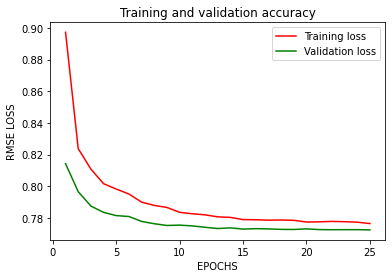

In [159]:
explore_loss(history_train=history_train, n_epochs=25)

In [160]:
set_random_seed(2002)
assert test(model = model, loss_fn = criterion, test_dl = test_loader).shape[0] == y_test.shape[0]

test() called: model=Model



  0%|          | 0/26 [00:00<?, ?it/s]

test RMSELoss:  8.74


## Задание 2. (0 баллов, но при невыполнении максимум за все задание &mdash; 0 баллов)

Напишите небольшой отчет о том, как вы добились полученного качества: какие средства использовали и какие эксперименты проводили. Подробно расскажите об архитектурах и значениях гиперпараметров, а также какие метрики на тесте они показывали. Чтобы отчет был зачтен, необходимо привести хотя бы 3 эксперимента.

# В начале, я испытывал много трудностей с подбором архитектуры и гиперпараметров (что неудивительно).
1. Мой первая (более-менее удачная) попытка была нейросеть с:
*   batch_size=64
*   И архитектурой вида: 
        self.dense1 = nn.Linear(90, 64)
        self.dense2 = nn.Linear(64, 32)
        self.dense3 = nn.Linear(32, 1)
с функций активации = leaky_relu, которая более менее помогала справляться с проблемой затухающего градиента, за счёт небольшого наглона при х меньше 0.
*   Оптимайзером послужила функция Adam:
        optimizer = torch.optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-4)
*   И итоговый RMSELoss на тесте выдал 8.80.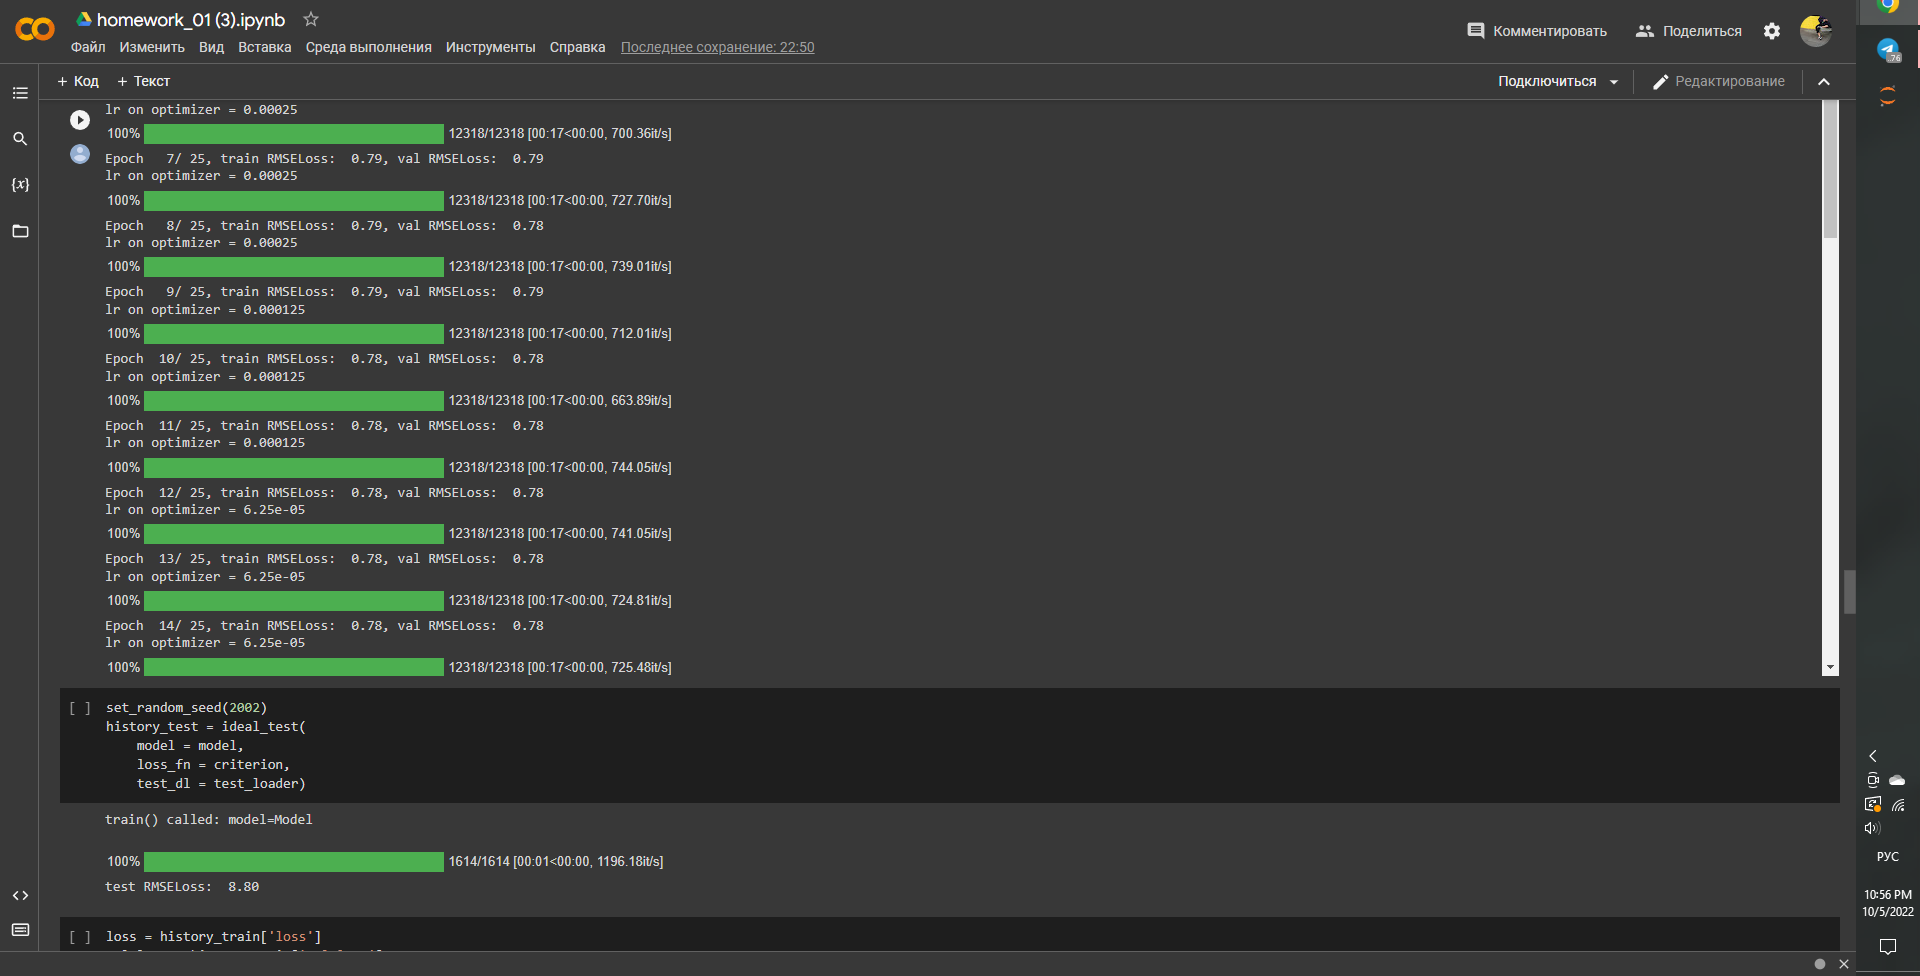







2. Вторая попытка была нейросеть с:
*   batch_size=64
*   И архитектурой вида: 
        self.dense1 = nn.Linear(90, 512)
        self.dense2 = nn.Linear(512, 256)
        self.dense3 = nn.Linear(256, 128)
        self.dense4 = nn.Linear(128, 64)
        self.dense5 = nn.Linear(64, 32)
        self.dense6 = nn.Linear(32, 1)
        self.dropout = nn.Dropout(0.25)
с функций активации = leaky_relu, которая более менее помогала справляться с проблемой затухающего градиента, за счёт небольшого наглона при х меньше 0.
Более того был введен дропаут, который вначале пути показал себя очень плохо, но с глубокой и широкой нейронной сетью показал себя неплохо.
*   Оптимайзером послужила функция Adam:
        optimizer = torch.optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-4)
*   И итоговый RMSELoss на тесте выдал 8.79.
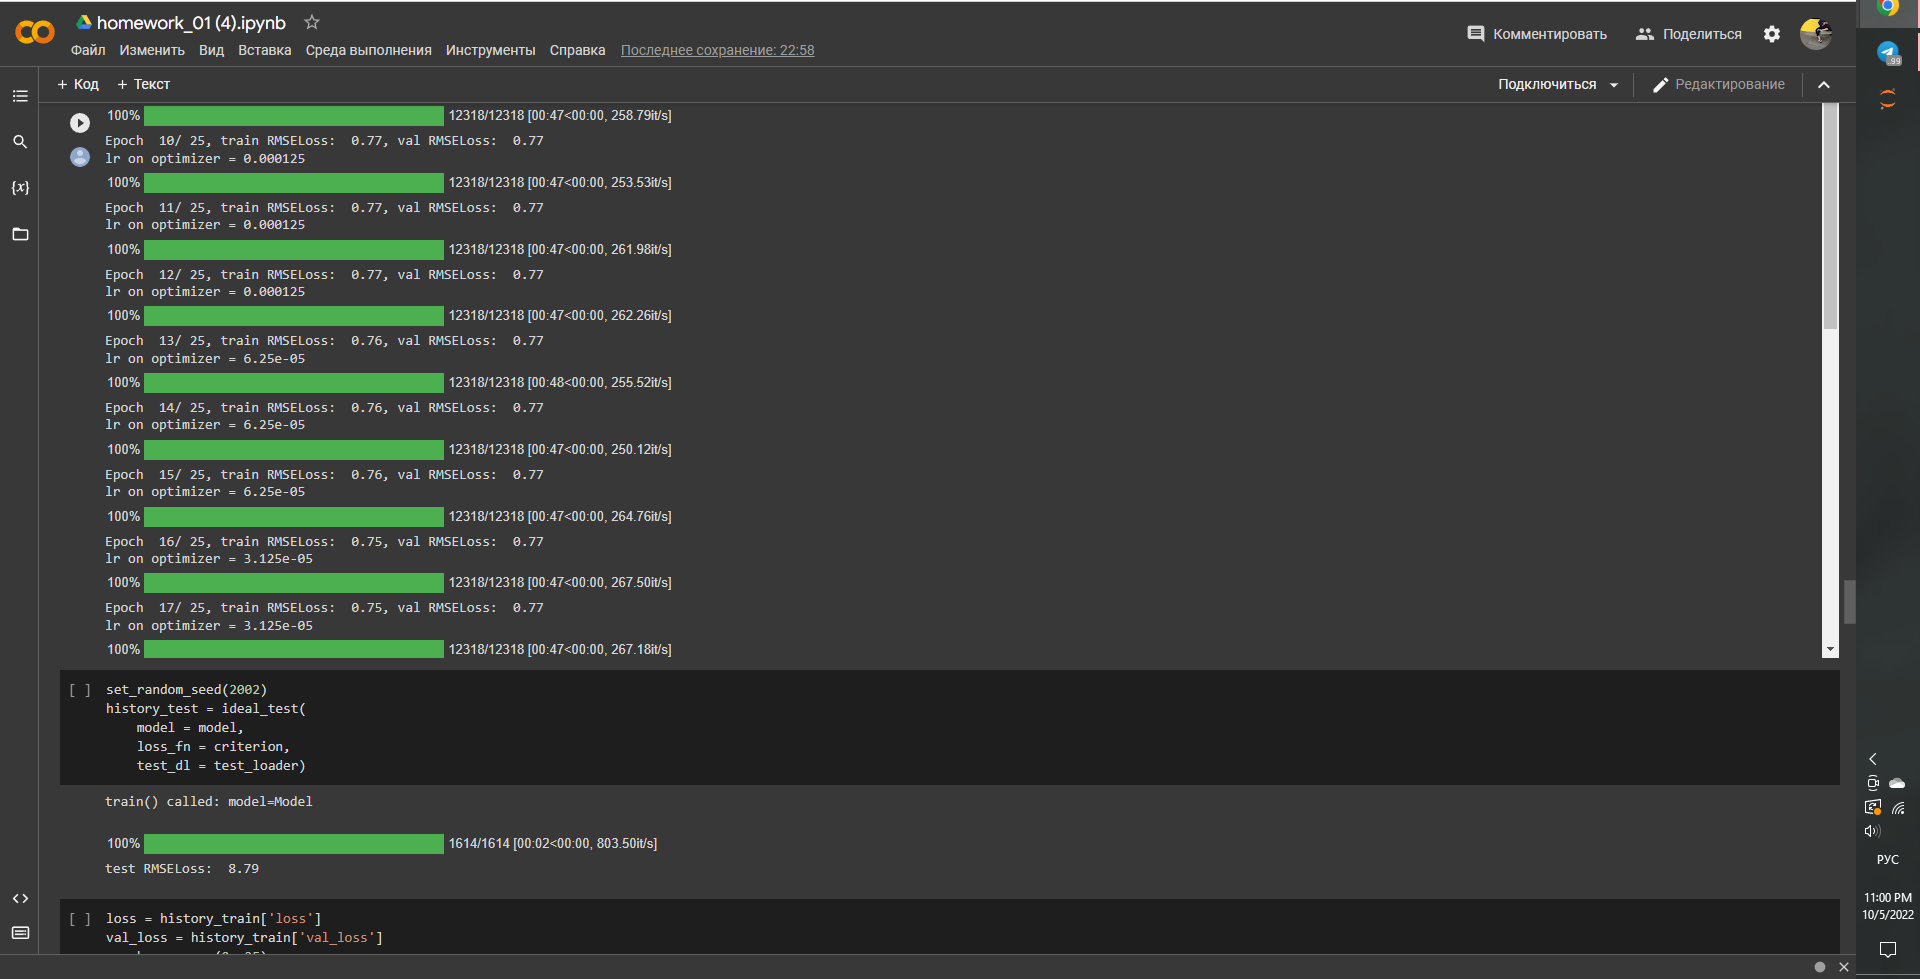

3. Третья (неудачная) попытка была нейросеть с:
*   batch_size=64
*   И архитектурой вида: 
        self.dense1 = nn.Linear(90, 64)
        self.dense2 = nn.Linear(64, 32)
        self.dense3 = nn.Linear(32, 1)
с функций активации = leaky_relu, которая более менее помогала справляться с проблемой затухающего градиента, за счёт небольшого наглона при х меньше 0.
*   Оптимайзером послужила функция Adam:
        optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
*   И итоговый RMSELoss на тесте выдал 8.84. 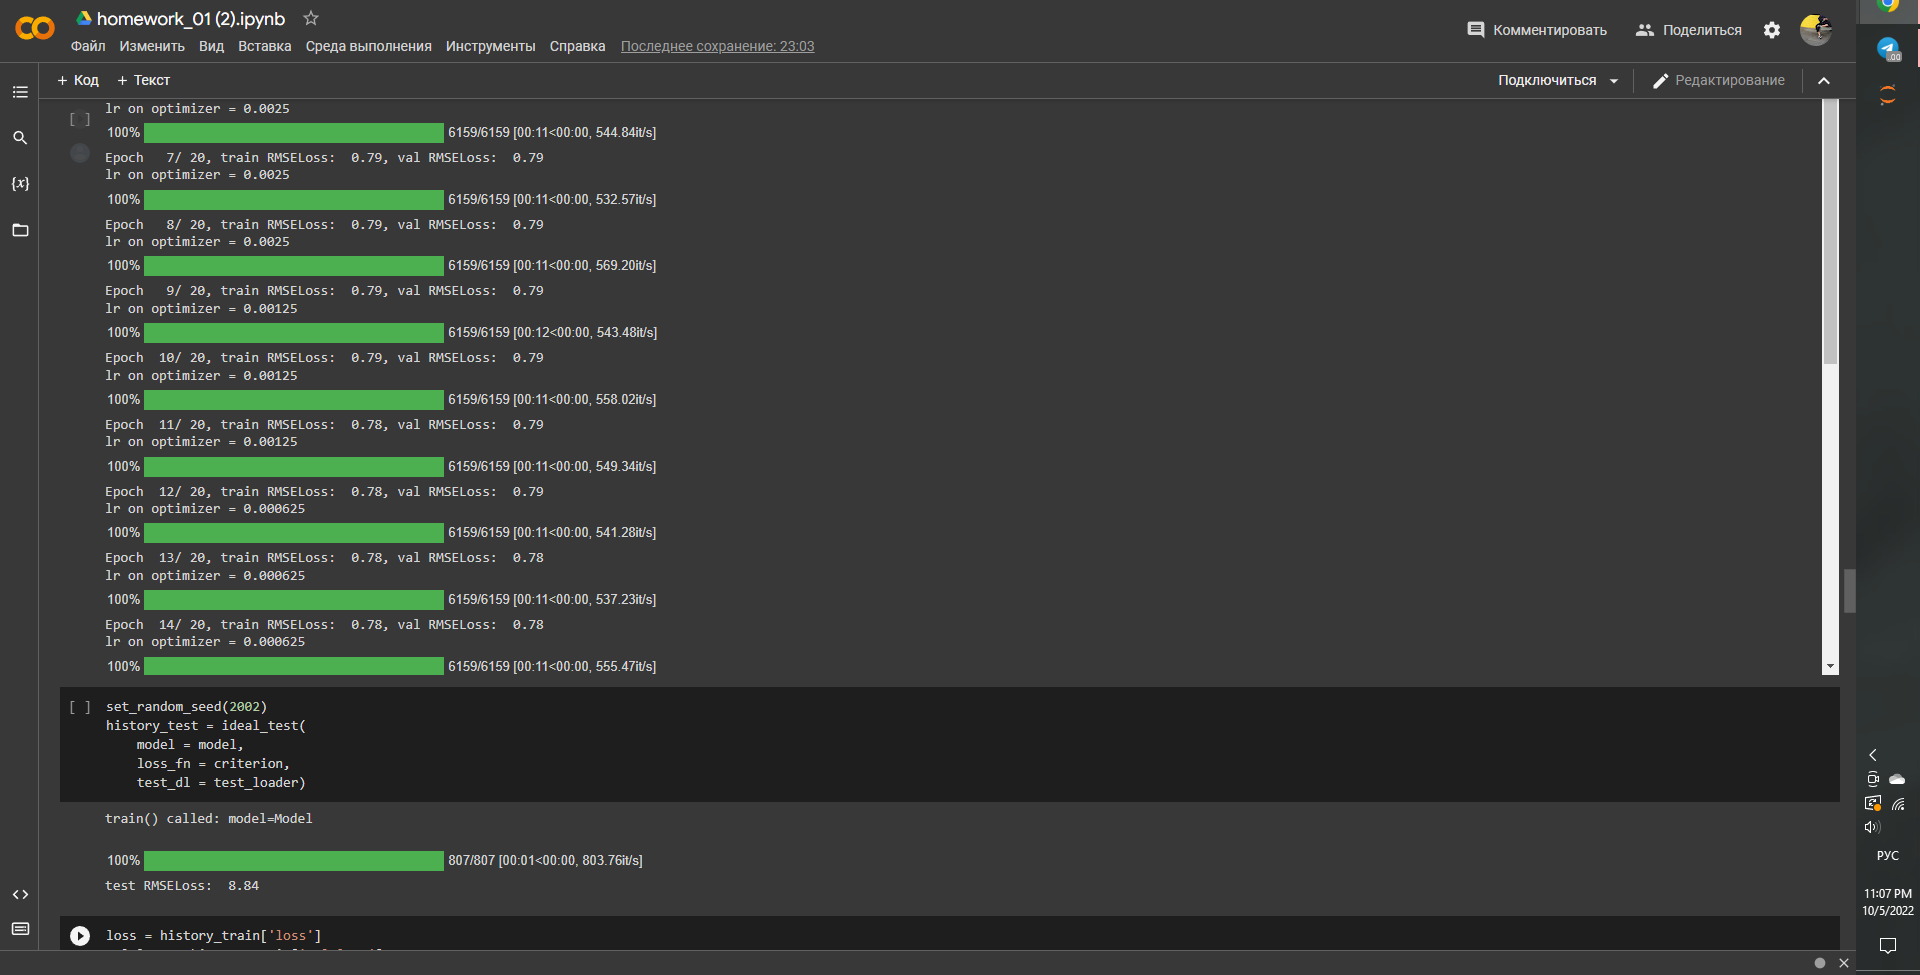

# В общем и целом, такие методы как снижение LR и использования дропаута сильно повлияли на конечный результат модели!